# LIGO - Gravitational Waves Detectability

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib
import sys
sys.path.append(r"C:\Users\ricca\Documents\Unimib-Code\AstroStatistics\Notebooks")
from Utilities import plot_settings

Load downsampled data with balanced classes members

In [2]:
y = np.load(r"C:\Users\ricca\Documents\Unimib-Code\AstroStatistics\Notebooks\Exam\LIGO\Npy\y_ds.npy")

In [3]:
data = np.load(r"C:\Users\ricca\Documents\Unimib-Code\AstroStatistics\Notebooks\Exam\LIGO\Npy\data_ds.npy")

In [4]:
keys = np.load(r"C:\Users\ricca\Documents\Unimib-Code\AstroStatistics\Notebooks\Exam\LIGO\Npy\keys.npy")

Take a look at class balance

In [5]:
print('Classes ratio : ', y[y==1].shape[0]/y[y==0].shape[0])

Classes ratio :  0.16461887847202003


In [6]:
data.mean(axis=1)

array([54.62510578,  7.08029103, 69.38442213, ..., 21.27342182,
       30.18463891, 43.11454956], shape=(20000,))

Data needs to be scaled first

In [7]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [8]:
S = RobustScaler().fit_transform(data)
#S = StandardScaler().fit_transform(data)

## Dimensionality Reduction: PCA

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA(n_components=S.shape[1])
P = pca.fit_transform(S)

Text(0, 0.5, 'Explained variance ratio')

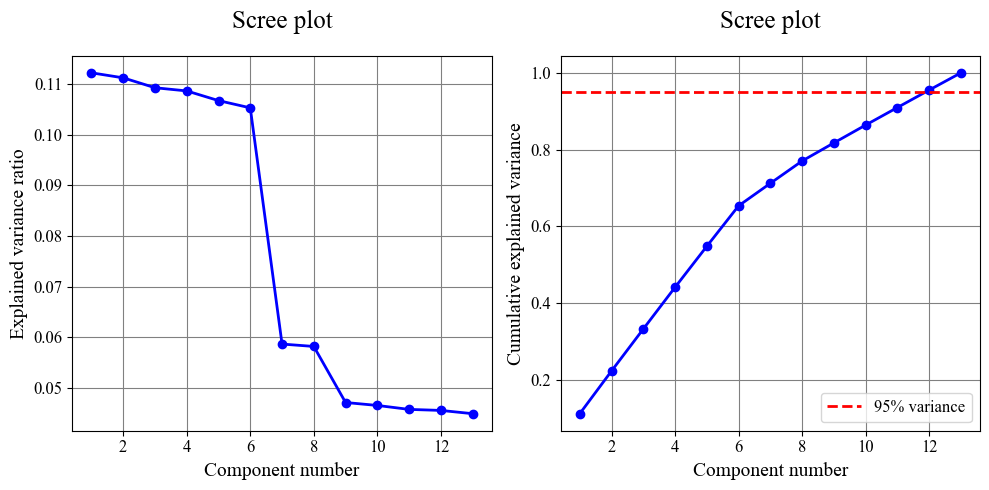

In [22]:
fig, axs = plt.subplots(1, 2)
axs[1].plot(range(1,S.shape[1]+1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-', color='blue')
axs[1].set_title('Scree plot')
axs[1].set_xlabel('Component number')
axs[1].axhline(0.95, 0, 1, linestyle='--', color='red', label='95% variance')
axs[1].set_ylabel('Cumulative explained variance')
axs[1].legend()

axs[0].plot(range(1,S.shape[1]+1), pca.explained_variance_ratio_, marker='o', linestyle='-', color='blue')
axs[0].set_title('Scree plot')
axs[0].set_xlabel('Component number')
axs[0].set_ylabel('Explained variance ratio')

From PCA analysis, $90 \%$ of the explained variance is contained in so much principal components with respect to the initial dataset feature space dimension that it is not the case to risk loosing information using PC for supervised classification

## Supervised Classification: Linear Discriminant Analysis

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from Utilities.Classify_vs import evaluate_classifier_over_features, visualize_classification_generic
from sklearn.model_selection import train_test_split

In [13]:
S_train, S_test, y_train, y_test = train_test_split(S, y, test_size=0.25, shuffle=True, stratify=y)

Computing predictions using first 1 features...
Computing predictions using first 2 features...
Computing predictions using first 3 features...
Computing predictions using first 4 features...
Computing predictions using first 5 features...
Computing predictions using first 6 features...
Computing predictions using first 7 features...
Computing predictions using first 8 features...
Computing predictions using first 9 features...
Computing predictions using first 10 features...
Computing predictions using first 11 features...
Computing predictions using first 12 features...
Computing predictions using first 13 features...


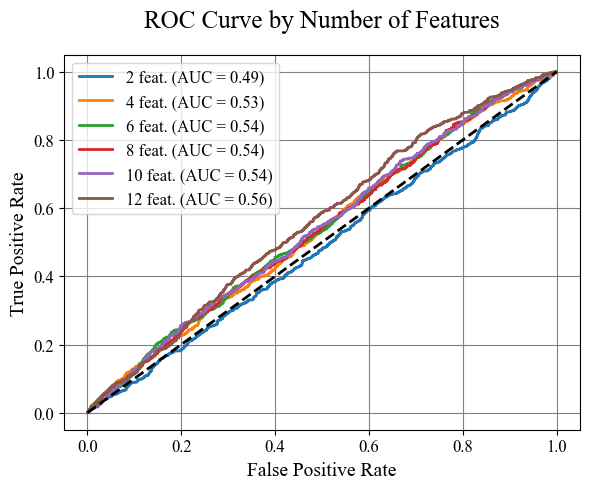

In [25]:
result = evaluate_classifier_over_features(S_train, S_test, y_train, y_test, LDA())

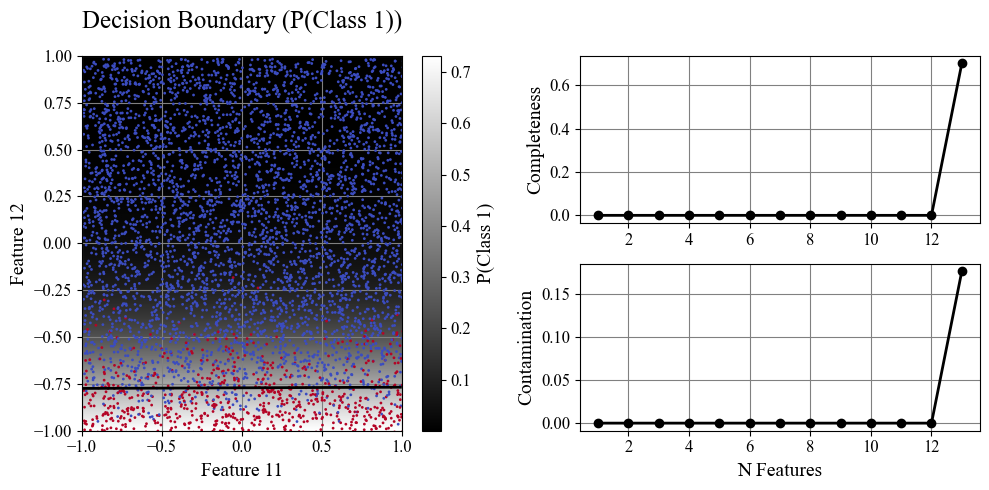

In [34]:
visualize_classification_generic(S_test[:, :result['best_n_features']], y_test, 
                                 result['best_classifier'],
                                 result['completeness'][:result['best_n_features']], 
                                 result['contamination'][:result['best_n_features']], 
                                 limits=[-1,1,-1,1],
                                 f=1, a=12, b=11)

In [ ]:
print(result['completeness'])
print(result['contamination'])

## Quadratic Discriminant Analysis

In [35]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

Computing predictions using first 1 features...
Computing predictions using first 2 features...
Computing predictions using first 3 features...
Computing predictions using first 4 features...
Computing predictions using first 5 features...
Computing predictions using first 6 features...
Computing predictions using first 7 features...
Computing predictions using first 8 features...
Computing predictions using first 9 features...
Computing predictions using first 10 features...
Computing predictions using first 11 features...
Computing predictions using first 12 features...
Computing predictions using first 13 features...


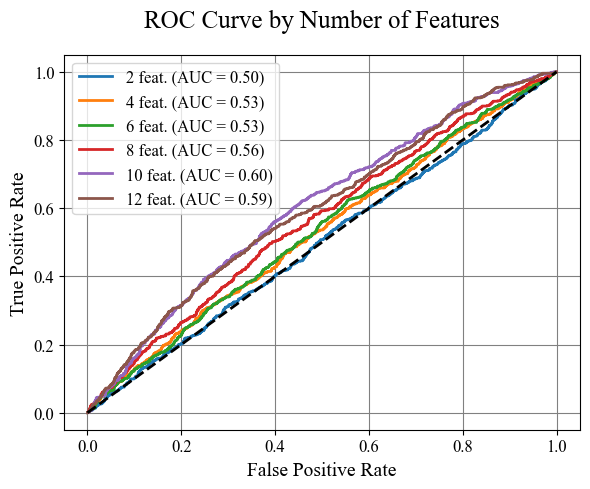

In [36]:
result = 0
result = evaluate_classifier_over_features(S_train, S_test, y_train, y_test, QDA())

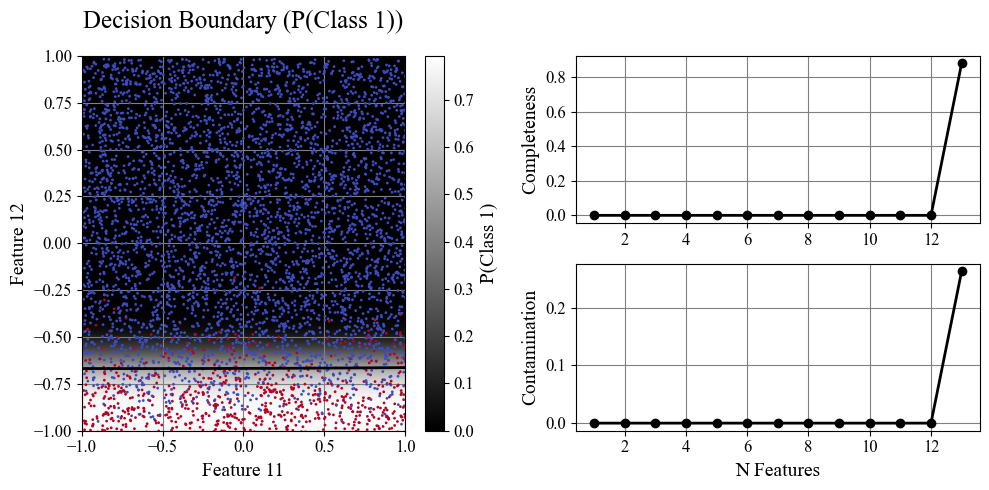

In [39]:
visualize_classification_generic(S_test[:, :result['best_n_features']], y_test, 
                                 result['best_classifier'],
                                 result['completeness'][:result['best_n_features']], 
                                 result['contamination'][:result['best_n_features']], 
                                 limits=[-1,1,-1,1],
                                 f=1, a=12, b=11)

In [ ]:
print(result['completeness'])
print(result['contamination'])

## GMM - Bayes

In [10]:
from astroML.classification import GMMBayes
from Utilities.Classify_vs import cross_validate_gmm_components

In [45]:
n_comps = np.linspace(2,10, 3, dtype=int)
returned = cross_validate_gmm_components(S_train, y_train, GMMBayes, n_components_list=n_comps)

Performing CV on 2 components


c:\Users\ricca\Documents\Unimib-Code\Astrostatistics\Notebooks\venv\Lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(
c:\Users\ricca\Documents\Unimib-Code\Astrostatistics\Notebooks\venv\Lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(
c:\Users\ricca\Documents\Unimib-Code\Astrostatistics\Notebooks\venv\Lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


Performing CV on 6 components


c:\Users\ricca\Documents\Unimib-Code\Astrostatistics\Notebooks\venv\Lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(
c:\Users\ricca\Documents\Unimib-Code\Astrostatistics\Notebooks\venv\Lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(
c:\Users\ricca\Documents\Unimib-Code\Astrostatistics\Notebooks\venv\Lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(
c:\Users\ricca\Documents\Unimib-Code\Astrostatistics\Notebooks\venv\Lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWar

Performing CV on 10 components


c:\Users\ricca\Documents\Unimib-Code\Astrostatistics\Notebooks\venv\Lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(
c:\Users\ricca\Documents\Unimib-Code\Astrostatistics\Notebooks\venv\Lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(
c:\Users\ricca\Documents\Unimib-Code\Astrostatistics\Notebooks\venv\Lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(
c:\Users\ricca\Documents\Unimib-Code\Astrostatistics\Notebooks\venv\Lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWar

Best n_components: 6


c:\Users\ricca\Documents\Unimib-Code\Astrostatistics\Notebooks\venv\Lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


Computing predictions using first 1 features...
Computing predictions using first 2 features...
Computing predictions using first 3 features...
Computing predictions using first 4 features...
Computing predictions using first 5 features...
Computing predictions using first 6 features...
Computing predictions using first 7 features...
Computing predictions using first 8 features...
Computing predictions using first 9 features...
Computing predictions using first 10 features...
Computing predictions using first 11 features...
Computing predictions using first 12 features...
Computing predictions using first 13 features...


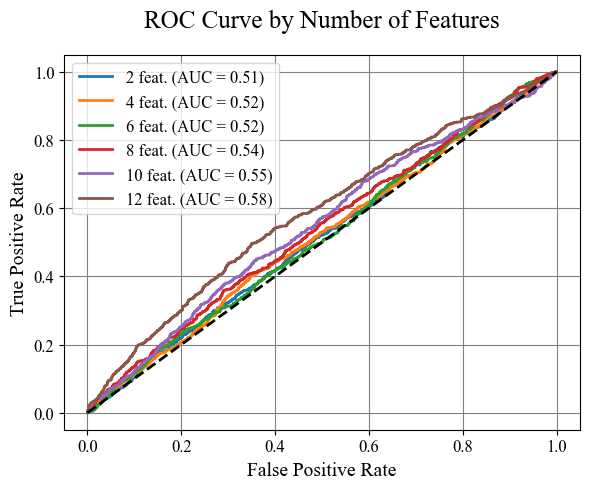

In [15]:
result = 0
GMM = GMMBayes(n_components=6, tol=1e-5, covariance_type='full', init_params='k-means++')
result = evaluate_classifier_over_features(S_train, S_test, y_train, y_test, GMM)

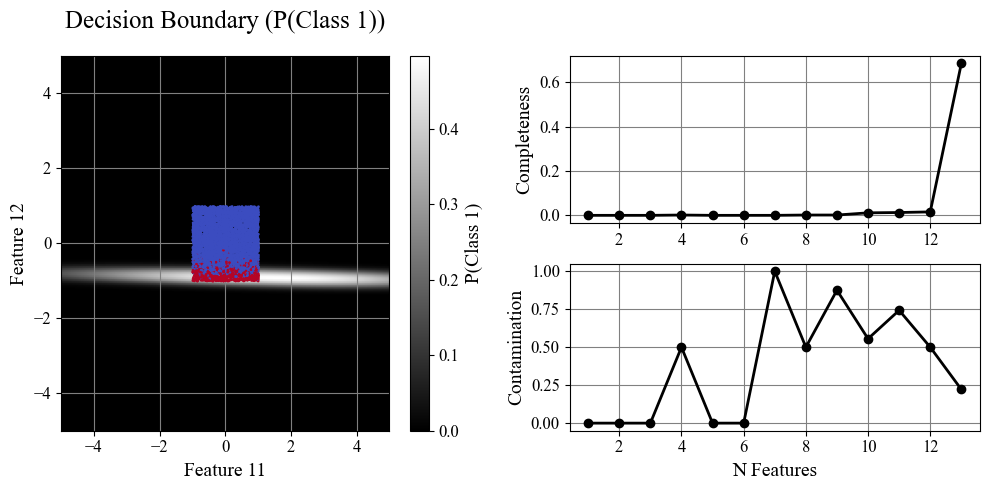

In [17]:
visualize_classification_generic(S_test[:, :result['best_n_features']], y_test, 
                                 result['best_classifier'],
                                 result['completeness'][:result['best_n_features']], 
                                 result['contamination'][:result['best_n_features']], 
                                 limits=[-5,5,-5,5],
                                 f=1, a=12, b=11)

## KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier as KNC

Computing predictions using first 1 features...
Computing predictions using first 2 features...
Computing predictions using first 3 features...
Computing predictions using first 4 features...
Computing predictions using first 5 features...
Computing predictions using first 6 features...
Computing predictions using first 7 features...
Computing predictions using first 8 features...
Computing predictions using first 9 features...
Computing predictions using first 10 features...
Computing predictions using first 11 features...
Computing predictions using first 12 features...
Computing predictions using first 13 features...


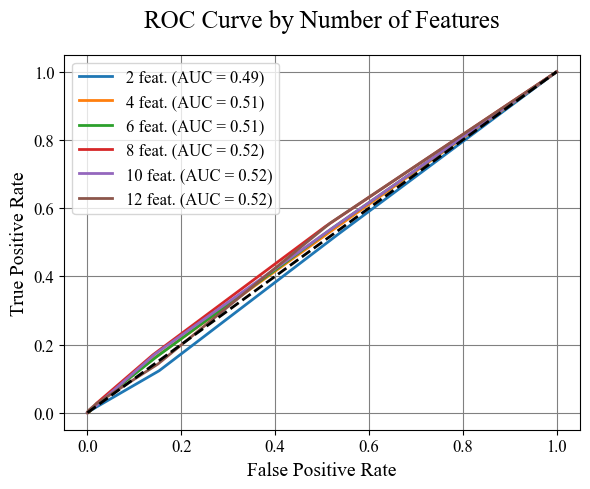

In [19]:
result = evaluate_classifier_over_features(S_train, S_test, y_train, y_test, KNC())

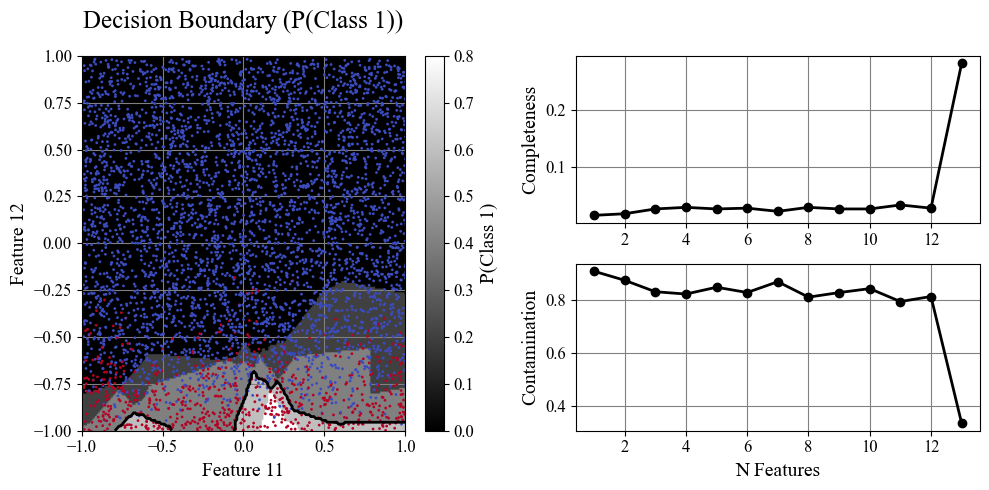

In [22]:
visualize_classification_generic(S_test[:, :result['best_n_features']], y_test, 
                                 result['best_classifier'],
                                 result['completeness'][:result['best_n_features']], 
                                 result['contamination'][:result['best_n_features']], 
                                 limits=[-1,1,-1,1],
                                 f=1, a=12, b=11)

In [29]:
print('Completeness  : ', result['completeness'])
print('Contamination : ', result['contamination'])

Completeness  :  [0.01414427 0.01697313 0.02545969 0.02828854 0.02545969 0.02687412
 0.02121641 0.02828854 0.02545969 0.02545969 0.03253182 0.02687412
 0.28288543]
Contamination :  [0.90909091 0.875      0.8317757  0.82300885 0.8487395  0.82882883
 0.86956522 0.81132075 0.82857143 0.84347826 0.79464286 0.81372549
 0.33554817]
